In [1]:
#KNN 회귀분석
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

#한글 출력 오류시 추가

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family=font_name)

Text(0, 0.5, '타깃')

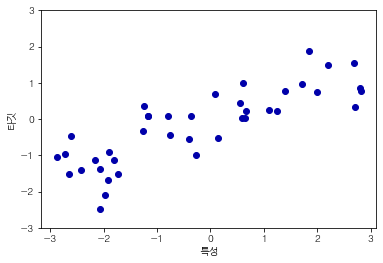

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=40)
#wave 데이터셋을 훈련 세트와 데이터 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
#이웃의 수를 3으로 설정
reg = KNeighborsRegressor(n_neighbors=3)
#훈련 데이터와 타깃을 이용하여 모델을 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print("테스트 세트 예측:\n:{}".format(reg.predict(X_test)))

테스트 세트 예측:
:[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [5]:
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2:0.83


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X,y  = mglearn.datasets.make_wave(n_samples=40)

#wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다
#test_size를 0.4로 설정
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.4)
#이웃의 수를 3으로 설정
reg = KNeighborsRegressor(n_neighbors=3)
#훈련 데이터와 타깃을 이용하여 모델을 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print("테스트 세트 예측:\n:{}".format(reg.predict(X_test)))

테스트 세트 예측:
:[-0.054  0.43   0.826 -1.894 -1.042 -1.631  0.169  0.912 -0.446 -1.042
 -0.493  0.826 -1.042  0.413 -0.446  0.43 ]


In [8]:
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2:0.68


X_train shape : (24, 1) X_test shape : (16, 1)
X_train shape : (24, 1) X_test shape : (16, 1)
X_train shape : (24, 1) X_test shape : (16, 1)


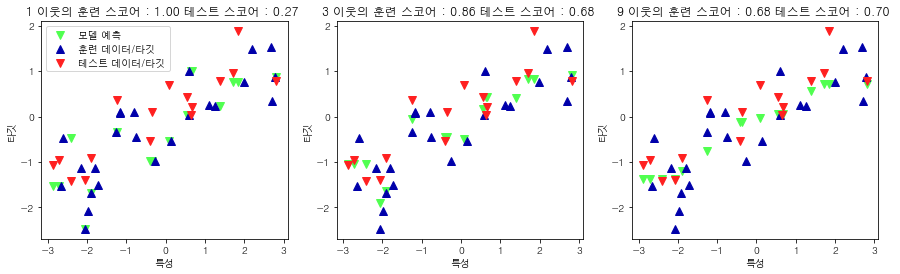

In [9]:
#교재 P.72
#KNeighborsRegressor 분석
#성능 분석
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for n_neighbors, ax in zip([1,3,9], axes) : 
    # 1, 3, 9 이웃을 이용해서 예측을 실시한다.
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    print("X_train shape : {}".format(X_train.shape), "X_test shape : {}".format(X_test.shape))
    # 모델 훈련
    reg.fit(X_train, y_train)
    ax.plot(X_test, reg.predict(X_test),'v', c=mglearn.cm3(2), markersize=8)
    ax.plot(X_train, y_train, '^', c=mglearn.cm3(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm3(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어 : {:.2f} 테스트 스코어 : {:.2f} ".
                format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
#이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서
#예측값이 훈련 데이터 포인트를 모두 지나감
#이는 매우 불안정한 예측을 만들어냄
#이웃을 더 많이 사용하면 훈련 데이터에는 잘 안맞을 수 있어도 더 안정된 예측을 얻음

In [10]:
#평균 제곱근 오차
# 기울기 a와 y 절편 b
ab = [3, 76]

# x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b에 a와 b 값을 대입하여 결과를 출력하는 함수
def predict(x):
    return ab[0]*x + ab[1]

# RMSE 함수
def rmse(p, a):
    return np.sqrt(((p - a) ** 2).mean())

# RMSE 함수를 각 y 값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result,y):
    return rmse(np.array(predict_result), np.array(y))

# 예측 값이 들어갈 빈 리스트
predict_result = []

# 모든 x 값을 한 번씩 대입하여
for i in range(len(x)):
    # predict_result 리스트를 완성한다.
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" % (x[i], y[i],
    predict(x[i])))
    
# 최종 RMSE 출력
print("rmse 최종값: " + str(rmse_val(predict_result,y)))

공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100
rmse 최종값: 3.3166247903554


In [11]:
#선형 회귀
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
#훈련 시작
lr = LinearRegression().fit(X_train, y_train)
#선형회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도 제어를 할 수 없음


print("테스트 세트 예측 : \n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
#기울기 파라미터는 가중치 또는 계수라고 함
#lr객체의 coef_속성에 저장되어 있음
#편향 또는 절편 파라미터는 intercept_속성에 저장되어 있음

테스트 세트 예측 : 
[-0.519 -1.372 -0.769  0.421 -1.13   0.045  0.723 -0.028  0.723 -1.13
 -0.769  0.723 -1.372  0.045  0.723]
테스트 세트 R^2 : 0.74
lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


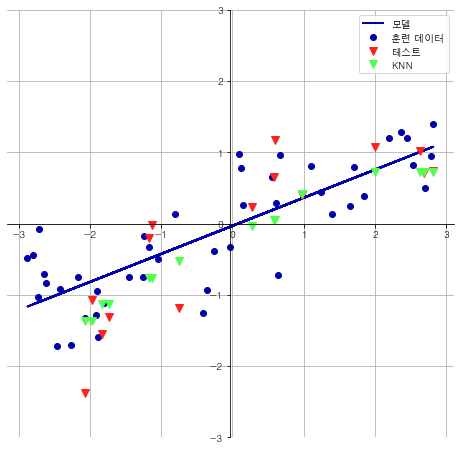

In [12]:
plt.figure(figsize=(8, 8))
plt.plot(X_train, lr.predict(X_train))
plt.plot(X_train, y_train, 'o', c=mglearn.cm2(0))
plt.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

# KNN 결과 출력
#1차원 특징이라서 정확률이 낮다. 샘플수가 커질수록 정확률이낮다. 데이터의 분포가 퍼져서
plt.plot(X_test, reg.predict(X_test),'v', c=mglearn.cm3(2),markersize=8)

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)

#ax.set_xlabel("Feature") 
#ax.set_ylabel("Target")
ax.legend(["모델", "훈련 데이터", "테스트", "KNN"], loc="best")
ax.grid(True)
ax.set_aspect('equal')  

In [13]:
#보스턴 주택 문제
from sklearn.datasets import load_boston
boston = load_boston()

print("boston.keys():\n", boston.keys())
print("boston.data : \n{}".format(boston['data'].shape))
print("boston 특성 이름 : \n", boston.feature_names)
print(boston['DESCR'] + "\n...")

df = pd.DataFrame(boston.data, columns = boston.feature_names)
print(df.head())

boston.keys():
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
boston.data : 
(506, 13)
boston 특성 이름 : 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
 

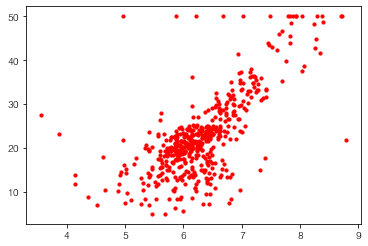

In [14]:
plt.scatter(boston.data[:, 5], boston.target, color='r', s=10)
#방의 개수와 주택가격 산점도

In [16]:
# 속상 하나로 선형회귀 분석
X = boston.data[:, 5]
print(X.shape)

# LinearRegression의 함수에 인자를 전달하기 위해서는
# 각 원소의 값이 담긴 2차원 배열을 (n,1)의 형태로 만들어야 한다. 
# atleast_2d 함수는 x 데이터를 (1,n)의 형태로 만들어준다.

X_1 = np.atleast_2d(X)
X_2 = np.transpose(X_1)
print(X_2.shape)
y = boston.target

lr.fit(X_2, y)

y_predicted = lr.predict(X_2)

print("w[0] : %f b : %f" % (lr.coef_[0], lr.intercept_))

(506,)
(506, 1)
w[0] : 9.102109 b : -34.670621


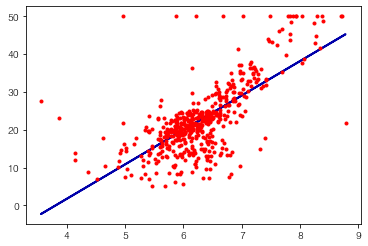

In [17]:
plt.plot(X_2, y_predicted)
plt.plot(X_2, y, 'o', color='r', markersize=3)
#선형 회귀모델 그리기

In [73]:
#선형 회귀 모델의 성능 측정
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)
print("X_train shape : {}".format(X_train.shape), "X_test shape : {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 예측 : \n{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lr.score(X_test, y_test)))

X_train shape : (379, 13) X_test shape : (127, 13)
훈련 세트 예측 : 
0.77
테스트 세트 R^2 : 0.64


In [74]:
#선형 회귀 모델의 성능 측정
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)
print("X_train shape : {}".format(X_train.shape), "X_test shape : {}".format(X_test.shape))
knn = KNeighborsRegressor().fit(X_train, y_train)
print("훈련 세트 예측 : \n{:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(knn.score(X_test, y_test)))

X_train shape : (379, 13) X_test shape : (127, 13)
훈련 세트 예측 : 
0.71
테스트 세트 R^2 : 0.46


In [20]:
#보스턴 확장 데이터
X, y= mglearn.datasets.load_extended_boston()
print("X_train shape : {}".format(X.shape))
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
print("X_train shape : {}".format(X_train.shape), "X_test shape : {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)

print("LR 훈련 세트 예측 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lr.score(X_test, y_test)))

knn = KNeighborsRegressor().fit(X_train, y_train)
print("KNN 훈련 세트 예측 : {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(knn.score(X_test, y_test)))

X_train shape : (506, 104)
X_train shape : (379, 104) X_test shape : (127, 104)
LR 훈련 세트 예측 : 0.95
테스트 세트 R^2 : 0.61
KNN 훈련 세트 예측 : 0.83
테스트 세트 R^2 : 0.56


In [21]:
X, y= mglearn.datasets.load_extended_boston()
print("X_train shape : {}".format(X.shape))
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
print("X_train shape : {}".format(X_train.shape), "X_test shape : {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)

print("LR 훈련 세트 예측 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lr.score(X_test, y_test)))

knn = KNeighborsRegressor().fit(X_train, y_train)
print("KNN 훈련 세트 예측 : {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(knn.score(X_test, y_test)))

X_train shape : (506, 104)
X_train shape : (379, 104) X_test shape : (127, 104)
LR 훈련 세트 예측 : 0.95
테스트 세트 R^2 : 0.61
KNN 훈련 세트 예측 : 0.83
테스트 세트 R^2 : 0.56


In [22]:
#릿지 회귀
#릿지도 최소적합법에서 사용한 것과 같은 예측함수를 사용
#리지회귀에서 가중치 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라
#추가 제약 조건을 만족시키기 위한 목적도 있음
#W의 모든 원소가 0에 가깝게 되기를 원함
#모든 특성이 출력에 주는 영향을 최소한으로 만듦(기울기를 작게 만듦)
#규제는 꽈대 적합이 되지 않도록 모델을 강제로 제한
#릿지 회귀에서 사용하는 규제 방식은 L2 규제

In [23]:
# 릿지 선형모델
#default alpha = 1.0
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, y_test)))
#alpha가 클수록 계수의 편차가 작다(과소적합)
#alpha가 작으면 계수 편차가 크다(과대적합)

훈련 세트 예측 : 0.89
테스트 세트 R^2 : 0.75


In [24]:
#linear regression
print("훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 예측 : 0.89
테스트 세트 R^2 : 0.75


In [25]:
#KNN regression
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(knn.score(X_test, y_test)))

훈련 세트 점수:0.90
테스트 세트 점수:0.61


In [27]:
#alpha = 10: 계수의 크기가 0에 가깝다
#alpha가 클수록 훈련 데이터의 성능이 나빠짐
#과소적합
#일반화에 도움이 됨
#모델 복잡도가 낮아진다

#alpha가 작으면 계수 과대적합
#계수에 거의 제한을 두지 않는다
#alpha = 0.1 계수의 크기의 폭이 크다 -> 선형 모델과 비슷해진다

In [45]:
#alpha=10, 과소적합
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge Alpha 10 훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, y_test)))

Ridge Alpha 10 훈련 세트 예측 : 0.93
테스트 세트 R^2 : 0.77


In [46]:
#alpha=5
ridge5 = Ridge(alpha=5).fit(X_train, y_train)
print("Ridge Alpha 5 훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, y_test)))

Ridge Alpha 5 훈련 세트 예측 : 0.93
테스트 세트 R^2 : 0.77


In [47]:
#alpha=0.5(default = 1이므로, 1은 생략)
ridge05 = Ridge(alpha=0.5).fit(X_train, y_train)
print("Ridge Alpha 0.5 훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, y_test)))

Ridge Alpha 0.5 훈련 세트 예측 : 0.93
테스트 세트 R^2 : 0.77


In [48]:
#alpha=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge Alpha 0.1 훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, y_test)))

Ridge Alpha 0.1 훈련 세트 예측 : 0.93
테스트 세트 R^2 : 0.77


In [49]:
#alpha=0.01, 과대적합
ridge001 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge Alpha 0.01 훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, y_test)))

Ridge Alpha 0.01 훈련 세트 예측 : 0.93
테스트 세트 R^2 : 0.77


In [50]:
#라소(라쏘, Lasso)
#리지회귀에서와 같이 라소도 계수를 0에 가깝게 만들려고 함
#라소에서 사용하는 규제는 L1 규제
#L1 규제의 결과로 라소를 사용할 때 어떤 계수는 0이 됨
#즉, 모델에서 완전히 제외되는 특성이 생김
#일부 계수가 0이 되기 때문에 모델을 이해하기 쉬움
#가장 중요한 특성이 무엇인지 드러냄

In [51]:
# 라쏘 회귀
#default = 1
#낮은 성능, 적은특성 사용
#과소 적합
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Lasso 훈련 세트 예측 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용 특성 갯수 : {}".format(np.sum(lasso.coef_ != 0)))

Lasso 훈련 세트 예측 : 0.29
테스트 세트 R^2 : 0.21
사용 특성 갯수 : 4


In [52]:
#alpha = 0.01
#패널티 효과 감소
#복잡도 증가
lasso001 = Lasso(alpha=0.01, max_iter = 100000).fit(X_train, y_train)
print("Lasso alpha 0.01 훈련 세트 예측 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용 특성 갯수 : {}".format(np.sum(lasso001.coef_ != 0)))

Lasso alpha 0.01 훈련 세트 예측 : 0.90
테스트 세트 R^2 : 0.77
사용 특성 갯수 : 33


In [53]:
#alpha를 아주 작게 하면 선형 모델과 유사
lasso00001 = Lasso(alpha=0.0001, max_iter = 100000).fit(X_train, y_train)
print("Lasso alpha 0.01 훈련 세트 예측 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용 특성 갯수 : {}".format(np.sum(lasso00001.coef_ != 0)))

Lasso alpha 0.01 훈련 세트 예측 : 0.95
테스트 세트 R^2 : 0.64
사용 특성 갯수 : 96


In [54]:
print("계수값 : \n", lasso.coef_)
print(np.where(lasso.coef_ != 0))

계수값 : 
 [-0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.    -0.
 -0.     0.    -5.353 -0.     0.    -0.     0.    -0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.     0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.     0.
  0.    -0.    -0.    -0.     0.    -0.    -0.     0.    -0.    -1.051
 -3.31  -0.    -0.     0.    -0.    -0.    -0.     0.    -0.    -0.414
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
 -0.     0.    -0.    -0.   ]
(array([12, 79, 80, 89], dtype=int64),)


Text(0.5, 0, '계수 크기')

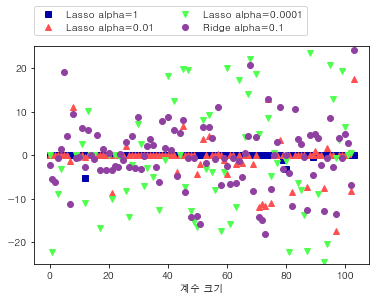

In [55]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
#alpha = 1
#계수 대부분이 0
#나머지도 크기가 작음
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
#alpha = 0.01
#많은 특성이 0
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
#alpha = 0.0001
#값이 커짐
#규제를 받지 않음

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.xlabel("계수 크기")

In [56]:
#리지와 라소중 보통은 리지를 선호
#하지만 특성이 많고 그 중 이부만 중요하다면 Lasso가 더 좋은 선택일수도 있음

In [58]:
#로지스틱회귀
#로지스틱 회귀는 실제로는 회귀가 아니라 분류 알고리즘
#종속변수(y)와 독립 변수(x)간의 관계를 함수로 나타내어 예측 모델에 사용
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
iris = datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름 : {}".format(iris['target_names']))
print("특성의 이름 : {}".format(iris['feature_names']))
X = iris['data'][:,3:]
print(X.shape)
y = (iris["target"] == 2).astype(np.int)
print(y.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름 : ['setosa' 'versicolor' 'virginica']
특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


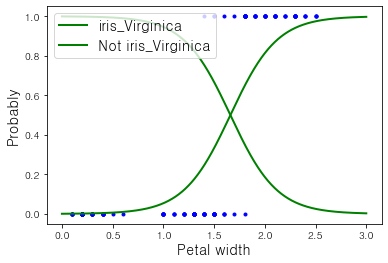

In [59]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정확률
X_new = np.linspace(0, 3 , 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new, y_proba[:,1], "g-", label="iris_Virginica")
plt.plot(X_new, y_proba[:,0], "g-", label="Not iris_Virginica")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probably", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


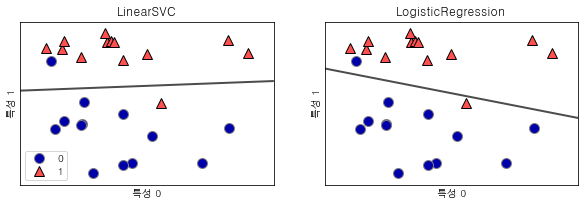

In [61]:
#forge 데이터셋을 사용하여 LogisticRegression과 LinearSVC 모델을 만들고
#이 선형 모델들이 만들어낸 결정 경계 그림으로 나타냄
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

flag, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes) : 
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax = ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()

In [78]:
#breast Cancer 데이터셋을 사용해서 로지스틱 회귀를 더 자세히 분석
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state = 42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print("훈련 세트 예측 : {:.3f}".format(log_reg.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.3f}".format(log_reg.score(X_test, y_test)))

훈련 세트 예측 : 0.958
테스트 세트 R^2 : 0.958


In [79]:
#1/100: 패널티가 작아진다
#규제완화
#훈련세트에 맞추려함
#개개의 포인터에 맞추려함
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)

print("훈련 세트 예측 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 예측 : 0.981
테스트 세트 R^2 : 0.965


In [80]:
#규제 강화
#패널티가 커짐
#계수를 0에 가깝게
#다수의 포인터에 맞추려함
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)

print("훈련 세트 예측 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 R^2 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 예측 : 0.953
테스트 세트 R^2 : 0.951


C=0.001 인 l1 로지스텍 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스텍 회귀의 테스트 정확도 : 0.92
C=1.000 인 l1 로지스텍 회귀의 훈련 정확도 : 0.96
C=1.000 인 l1 로지스텍 회귀의 테스트 정확도 : 0.96
C=100.000 인 l1 로지스텍 회귀의 훈련 정확도 : 0.99
C=100.000 인 l1 로지스텍 회귀의 테스트 정확도 : 0.98


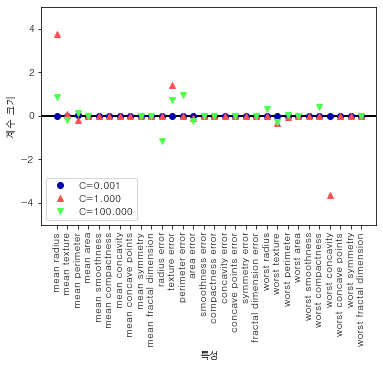

In [81]:
#L1규제를 사용할 때의 분류 정확도와 계수 그래프
#더 이해하기 쉬운 모델을 원한다면 L1 규제를 사용하는 것이 좋음
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']) : 
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스텍 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스텍 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

In [82]:
print("사용한 특성의 개수:{}".format(np.sum(lr_l1.coef_!=0)))
print("사용한 특성:{}\n".format(lr_l1.coef_))

사용한 특성의 개수:23
사용한 특성:[[  0.869  -0.194   0.118  -0.005 -12.402  65.663  -5.299 -86.622   0.
    0.     -1.16    0.725   0.959  -0.244   0.      0.     36.625   0.
   34.292   0.      0.314  -0.305   0.039  -0.023 -50.804   0.403 -10.612
  -45.297 -19.545   0.   ]]

